In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#202331310 - Muhammad Alfin Hariansyah

In [2]:
# Baca gambar dan konversi ke format yang sesuai
image = cv2.imread("nama.jpg")
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#202331310 - Muhammad Alfin Hariansyah

In [3]:
# Rentang HSV untuk deteksi warna
red_range1 = cv2.inRange(hsv_img, np.array([0, 100, 100]), np.array([10, 255, 255]))
red_range2 = cv2.inRange(hsv_img, np.array([160, 100, 100]), np.array([180, 255, 255]))
mask_merah = cv2.bitwise_or(red_range1, red_range2)

mask_hijau = cv2.inRange(hsv_img, np.array([40, 100, 100]), np.array([80, 255, 255]))
mask_biru = cv2.inRange(hsv_img, np.array([100, 100, 100]), np.array([140, 255, 255]))
#202331310 - Muhammad Alfin Hariansyah

In [4]:
# Fungsi untuk menyorot teks non-target dengan latar putih
def tampilkan_teks(mask_target):
    output = np.full_like(rgb_img, 255)  # Background putih
    
    putih_bg = np.all(rgb_img >= 180, axis=2)  # Masking putih
    bukan_target = np.logical_and(mask_target == 0, ~putih_bg)
    
    output[bukan_target] = [0, 0, 0]  # Teks jadi hitam
    return output
#202331310 - Muhammad Alfin Hariansyah

In [5]:
# Terapkan untuk masing-masing warna
hasil_merah = tampilkan_teks(mask_merah)
hasil_hijau = tampilkan_teks(mask_hijau)
hasil_biru = tampilkan_teks(mask_biru)
#202331310 - Muhammad Alfin Hariansyah

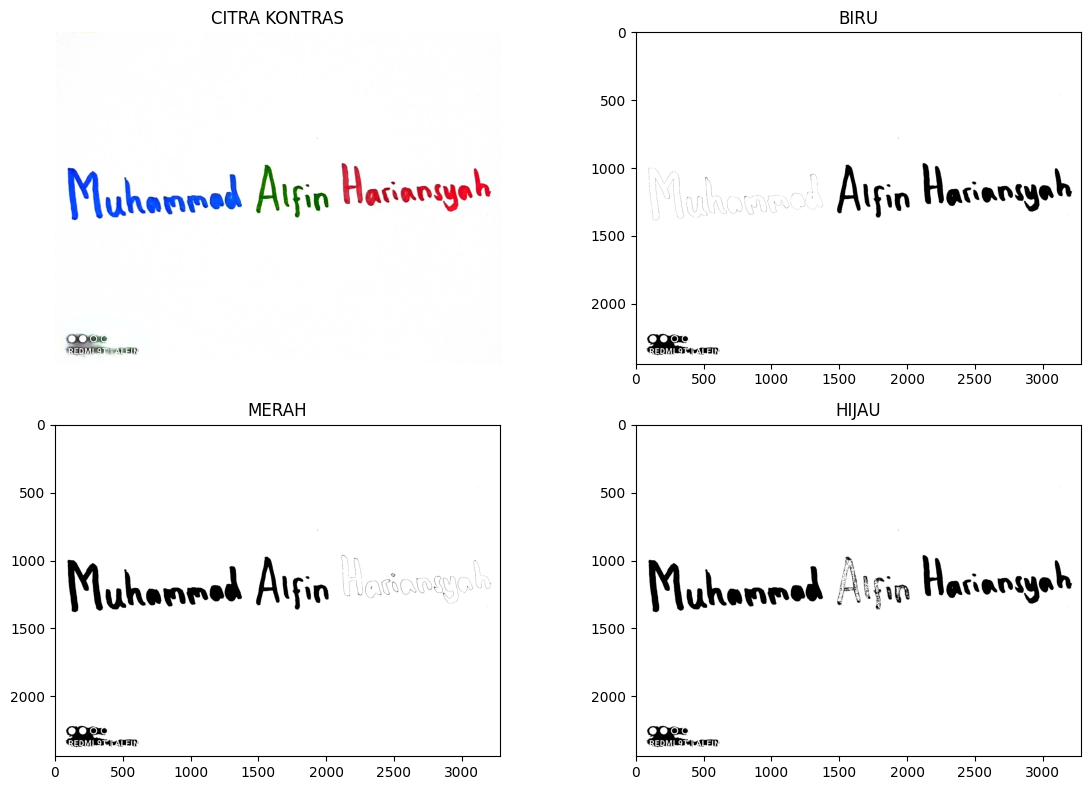

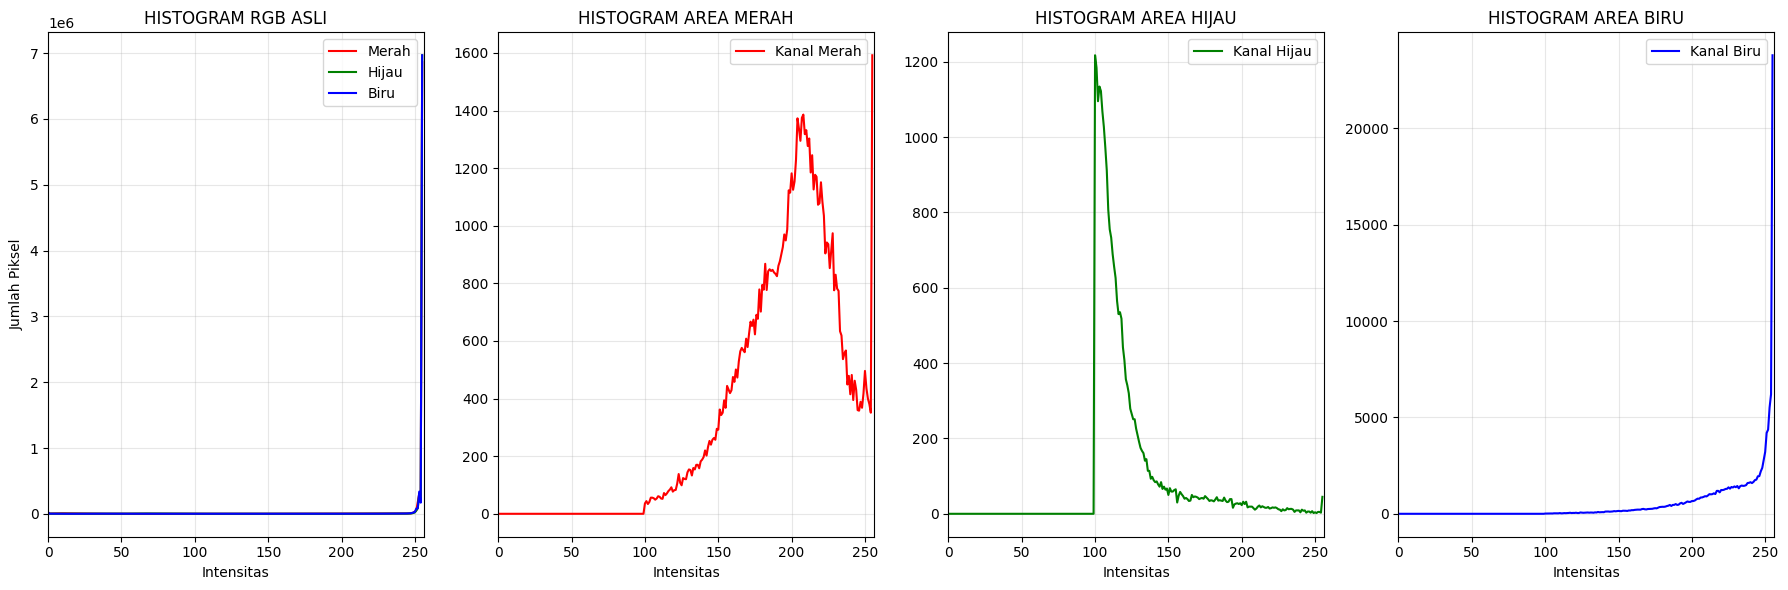

In [6]:
# Tampilkan gambar asli dan hasil deteksi
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(rgb_img)
plt.title("CITRA KONTRAS")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(hasil_biru)
plt.title("BIRU")
plt.axis("on")

plt.subplot(2, 2, 3)
plt.imshow(hasil_merah)
plt.title("MERAH")
plt.axis("on")

plt.subplot(2, 2, 4)
plt.imshow(hasil_hijau)
plt.title("HIJAU")
plt.axis("on")

plt.tight_layout()
plt.show()

# Histogram RGB dan masing-masing warna
plt.figure(figsize=(18, 6))

# Histogram RGB asli
plt.subplot(1, 4, 1)
warna = ['r', 'g', 'b']
nama_kanal = ['Merah', 'Hijau', 'Biru']
for i, (w, label) in enumerate(zip(warna, nama_kanal)):
    hist = cv2.calcHist([rgb_img], [i], None, [256], [0, 256])
    plt.plot(hist, color=w, label=label)
plt.title("HISTOGRAM RGB ASLI")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim([0, 256])

# Histogram warna merah
plt.subplot(1, 4, 2)
hist_m = cv2.calcHist([rgb_img], [0], mask_merah, [256], [0, 256])
plt.plot(hist_m, color='r', label='Kanal Merah')
plt.title("HISTOGRAM AREA MERAH")
plt.xlabel("Intensitas")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim([0, 256])

# Histogram warna hijau
plt.subplot(1, 4, 3)
hist_h = cv2.calcHist([rgb_img], [1], mask_hijau, [256], [0, 256])
plt.plot(hist_h, color='g', label='Kanal Hijau')
plt.title("HISTOGRAM AREA HIJAU")
plt.xlabel("Intensitas")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim([0, 256])

# Histogram warna biru
plt.subplot(1, 4, 4)
hist_b = cv2.calcHist([rgb_img], [2], mask_biru, [256], [0, 256])
plt.plot(hist_b, color='b', label='Kanal Biru')
plt.title("HISTOGRAM AREA BIRU")
plt.xlabel("Intensitas")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()
#202331310 - Muhammad Alfin Hariansyah